In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("Unique.csv")
df.head()

Country  Year  Gender  Life expectancy  Unemployment  Infant Mortality  \
0  Afghanistan  2000  Female           57.120        13.846              85.0   
1  Afghanistan  2001  Female           57.596        13.849              82.7   
2  Afghanistan  2002  Female           58.080        14.355              80.4   
3  Afghanistan  2003  Female           58.578        14.222              77.8   
4  Afghanistan  2004  Female           59.093        14.047              75.3   

            GDP           GNI  Clean fuels and cooking technologies  \
0  1.368449e+10  1.824044e+10                                   6.4   
1  1.368449e+10  1.824044e+10                                   7.2   
2  4.055180e+09  1.824044e+10                                   8.2   
3  4.515559e+09  1.824044e+10                                   9.4   
4  5.226779e+09  1.824044e+10                                  10.4   

   Per Capita  ...  DPT Immunization  HepB3 Immunization  \
0  434.739536  ...              24.0           65.076923   
1  434.739536  ...              33.0           65.076923   
2  179.426579  ...              36.0           65.076923   
3  190.683814  ...              41.0           65.076923   
4  211.382074  ...              50.0           65.076923   

   Measles Immunization  Hospital beds  Basic sanitation services  \
0                  27.0           0.30                  21.870802   
1                  37.0           0.39                  21.881304   
2                  35.0           0.39                  23.274193   
3                  39.0           0.39                  24.667435   
4                  48.0           0.39                  26.067695   

   Tuberculosis treatment  Urban population  Rural population  \
0                    85.0            22.078            77.922   
1                    84.0            22.169            77.831   
2                    87.0            22.261            77.739   
3                    86.0            22.353            77.647   
4                    89.0            22.500            77.500   

   Non-communicable Mortality  Sucide Rate  
0                        39.4          4.8  
1                        40.1          4.8  
2                        40.5          4.6  
3                        40.1          4.6  
4                        40.2          4.6  

[5 rows x 22 columns]

In [3]:
df.shape

(9928, 22)

In [4]:
df.columns

Index(['Country', 'Year', 'Gender', 'Life expectancy', 'Unemployment',
       'Infant Mortality', 'GDP', 'GNI',
       'Clean fuels and cooking technologies', 'Per Capita',
       'Mortality caused by road traffic injury', 'Tuberculosis Incidence',
       'DPT Immunization', 'HepB3 Immunization', 'Measles Immunization',
       'Hospital beds', 'Basic sanitation services', 'Tuberculosis treatment',
       'Urban population', 'Rural population', 'Non-communicable Mortality',
       'Sucide Rate'],
      dtype='object')

**Country:** Indicates the country for which the data is recorded or predicted.

**Year:** Represents the specific year to which the data corresponds.

**Gender:** Specifies the gender (male, female, or potentially other classifications) for which the life expectancy prediction or related data is provided.
**Life expectancy:** The predicted or recorded average number of years a person is expected to live based on various factors including health, socioeconomic conditions, and more.

**Unemployment:** The percentage or rate of unemployed individuals in the given population.

**Infant Mortality:** The number of deaths of infants under one year old per 1,000 live births in a given year.

**GDP (Gross Domestic Product):** The total value of goods and services produced by a country in a specific time frame, often used as an indicator of the country's economic health.

**GNI (Gross National Income):** The total domestic and foreign output claimed by residents of a country, consisting of GDP plus net income from abroad.

**Clean fuels and cooking technologies:** This might indicate the prevalence or availability of clean and efficient fuel sources or cooking technologies in households, which can impact health and life expectancy.

**Per Capita:** Refers to values calculated per person, typically used to evaluate averages or metrics based on an individual's share within the population.

**Mortality caused by road traffic injury:** Indicates the number or rate of deaths resulting from road traffic accidents.
Tuberculosis Incidence: Refers to the number of new cases of tuberculosis within a specific population during a given time period.

**DPT Immunization:** The percentage or rate of individuals vaccinated against Diphtheria, Pertussis (Whooping Cough), and Tetanus.

**HepB3 Immunization:** The percentage or rate of individuals vaccinated against Hepatitis B.

**Measles Immunization:** The percentage or rate of individuals vaccinated against Measles.

**Hospital beds:** Indicates the number of hospital beds available per population, which can relate to healthcare access and life expectancy.

**Basic sanitation services:** Refers to access to basic sanitation facilities like toilets, which significantly impacts public health.

**Tuberculosis treatment:** Indicates the availability or success rate of treatment for tuberculosis cases.

**Urban population:** The percentage or number of people living in urban areas within a country.

**Rural population:** The percentage or number of people living in rural areas within a country.

**Non-communicable Mortality:** The number of deaths from non-communicable diseases such as heart disease, cancer, diabetes, etc.

**Suicide Rate:** The number of suicides per population, indicating mental health and social well-being factors.

In [5]:
df.isnull().sum()

Country                                    0
Year                                       0
Gender                                     0
Life expectancy                            0
Unemployment                               0
Infant Mortality                           0
GDP                                        0
GNI                                        0
Clean fuels and cooking technologies       0
Per Capita                                 0
Mortality caused by road traffic injury    0
Tuberculosis Incidence                     0
DPT Immunization                           0
HepB3 Immunization                         0
Measles Immunization                       0
Hospital beds                              0
Basic sanitation services                  0
Tuberculosis treatment                     0
Urban population                           0
Rural population                           0
Non-communicable Mortality                 0
Sucide Rate                                0
dtype: int

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  9928 non-null   object 
 1   Year                                     9928 non-null   int64  
 2   Gender                                   9928 non-null   object 
 3   Life expectancy                          9928 non-null   float64
 4   Unemployment                             9928 non-null   float64
 5   Infant Mortality                         9928 non-null   float64
 6   GDP                                      9928 non-null   float64
 7   GNI                                      9928 non-null   float64
 8   Clean fuels and cooking technologies     9928 non-null   float64
 9   Per Capita                               9928 non-null   float64
 10  Mortality caused by road traffic injury  9928 no

In [7]:
df.duplicated().sum()

0

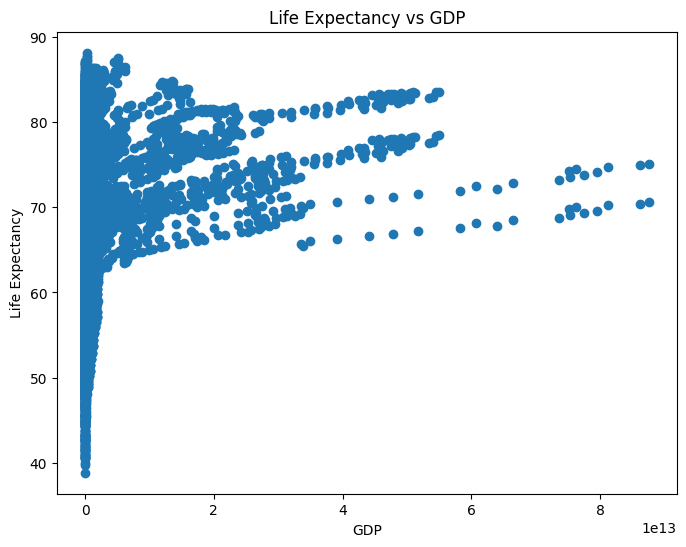

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GDP'], df['Life expectancy'])
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs GDP')
plt.show()

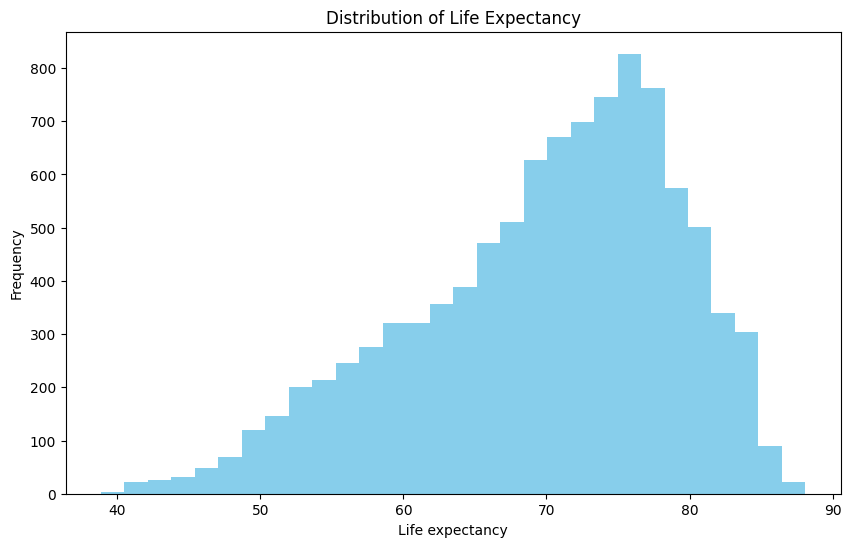

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Life expectancy'], bins=30, color='skyblue')
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()


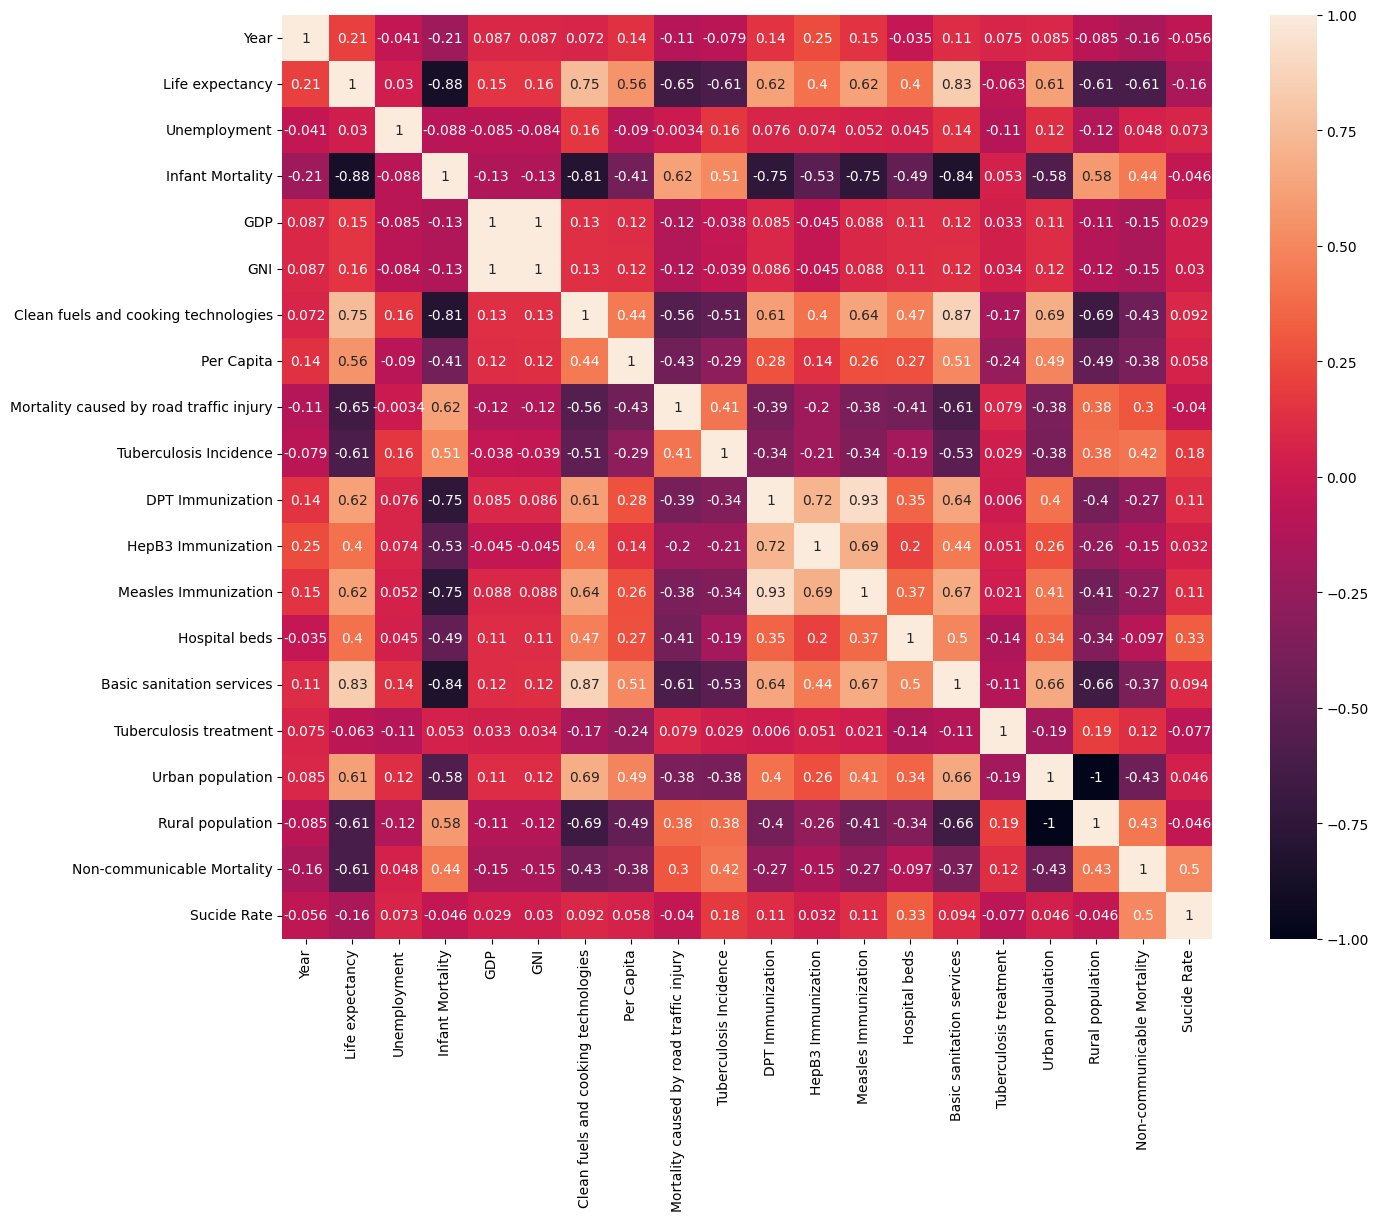

In [12]:
numeric_df = df.select_dtypes(include=[np.number])  
fig, ax = plt.subplots(figsize=(15, 12))  
sns.heatmap(numeric_df.corr(), annot=True, ax=ax)
plt.show()

In [13]:
data_encoded = pd.get_dummies(df, columns=['Country', 'Gender'])


X = data_encoded.drop(columns=['Life expectancy'])
y = data_encoded['Life expectancy']

In [14]:
data_encoded

Year  Life expectancy  Unemployment  Infant Mortality           GDP  \
0     2000           57.120        13.846              85.0  1.368449e+10   
1     2001           57.596        13.849              82.7  1.368449e+10   
2     2002           58.080        14.355              80.4  4.055180e+09   
3     2003           58.578        14.222              77.8  4.515559e+09   
4     2004           59.093        14.047              75.3  5.226779e+09   
...    ...              ...           ...               ...           ...   
9923  2015           57.778         4.352              46.6  1.996312e+10   
9924  2016           58.565         4.358              45.1  2.054868e+10   
9925  2017           59.105         4.353              44.2  1.758489e+10   
9926  2018           59.501         4.360              42.9  1.811554e+10   
9927  2019           59.798         4.393              42.1  1.928429e+10   

               GNI  Clean fuels and cooking technologies   Per Capita  \
0     1.824044e+10                              6.400000   434.739536   
1     1.824044e+10                              7.200000   434.739536   
2     1.824044e+10                              8.200000   179.426579   
3     1.824044e+10                              9.400000   190.683814   
4     1.824044e+10                             10.400000   211.382074   
...            ...                                   ...          ...   
9923  1.959700e+10                             29.799999  1445.069702   
9924  2.015340e+10                             29.700001  1464.588957   
9925  1.727577e+10                             29.600000  1235.189032   
9926  1.781019e+10                             29.799999  1254.642265   
9927  1.889662e+10                             30.000000  1316.740657   

      Mortality caused by road traffic injury  Tuberculosis Incidence  ...  \
0                                        14.7                   190.0  ...   
1                                        15.1                   189.0  ...   
2                                        14.9                   189.0  ...   
3                                        15.0                   189.0  ...   
4                                        15.2                   189.0  ...   
...                                       ...                     ...  ...   
9923                                     38.7                   242.0  ...   
9924                                     39.9                   233.0  ...   
9925                                     40.1                   221.0  ...   
9926                                     40.6                   210.0  ...   
9927                                     41.2                   199.0  ...   

      Country_Venezuela, RB  Country_Vietnam  Country_Virgin Islands (U.S.)  \
0                     False            False                          False   
1                     False            False                          False   
2                     False            False                          False   
3                     False            False                          False   
4                     False            False                          False   
...                     ...              ...                            ...   
9923                  False            False                          False   
9924                  False            False                          False   
9925                  False            False                          False   
9926                  False            False                          False   
9927                  False            False                          False   

      Country_West Bank and Gaza  Country_World  Country_Yemen, Rep.  \
0                          False          False                False   
1                          False          False                False   
2                          False          False                False   
3                          Fal

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [17]:
y_pred = model.predict(X_test)


In [18]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 2.424453356166371
R-squared: 0.970438785452259


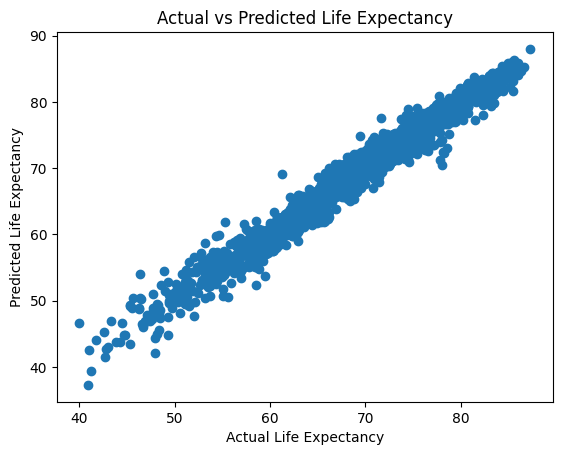

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()


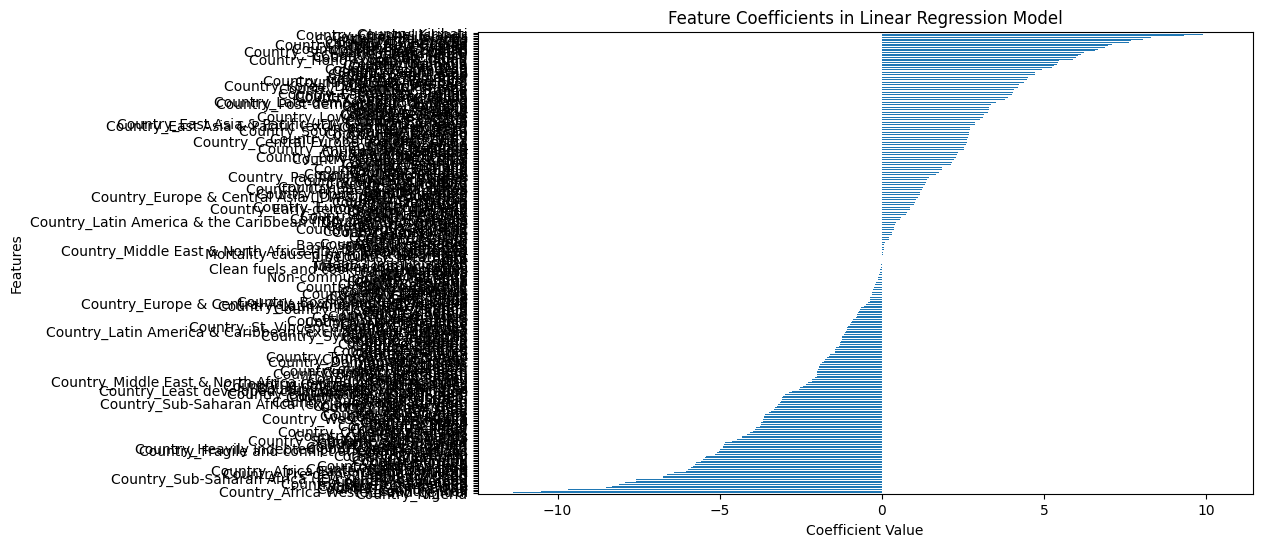

In [20]:
# Get feature coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients = coefficients.sort_values()

# Plotting feature coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Coefficients in Linear Regression Model')
plt.show()


In [21]:
import plotly.graph_objs as go
import plotly.express as px

# Get feature coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients = coefficients.sort_values()

# Creating a horizontal bar plot for feature coefficients using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    y=coefficients.index,
    x=coefficients.values,
    orientation='h',
    marker=dict(color='blue'),  # Change color if desired
))

fig.update_layout(
    title='Feature Coefficients in Linear Regression Model',
    xaxis_title='Coefficient Value',
    yaxis_title='Features',
    height=600,
    width=800,
    yaxis=dict(automargin=True),
)

fig.show()


In [23]:
df2=pd.read_csv("Unique.csv")
df2.head()

Country  Year  Gender  Life expectancy  Unemployment  Infant Mortality  \
0  Afghanistan  2000  Female           57.120        13.846              85.0   
1  Afghanistan  2001  Female           57.596        13.849              82.7   
2  Afghanistan  2002  Female           58.080        14.355              80.4   
3  Afghanistan  2003  Female           58.578        14.222              77.8   
4  Afghanistan  2004  Female           59.093        14.047              75.3   

            GDP           GNI  Clean fuels and cooking technologies  \
0  1.368449e+10  1.824044e+10                                   6.4   
1  1.368449e+10  1.824044e+10                                   7.2   
2  4.055180e+09  1.824044e+10                                   8.2   
3  4.515559e+09  1.824044e+10                                   9.4   
4  5.226779e+09  1.824044e+10                                  10.4   

   Per Capita  ...  DPT Immunization  HepB3 Immunization  \
0  434.739536  ...              24.0           65.076923   
1  434.739536  ...              33.0           65.076923   
2  179.426579  ...              36.0           65.076923   
3  190.683814  ...              41.0           65.076923   
4  211.382074  ...              50.0           65.076923   

   Measles Immunization  Hospital beds  Basic sanitation services  \
0                  27.0           0.30                  21.870802   
1                  37.0           0.39                  21.881304   
2                  35.0           0.39                  23.274193   
3                  39.0           0.39                  24.667435   
4                  48.0           0.39                  26.067695   

   Tuberculosis treatment  Urban population  Rural population  \
0                    85.0            22.078            77.922   
1                    84.0            22.169            77.831   
2                    87.0            22.261            77.739   
3                    86.0            22.353            77.647   
4                    89.0            22.500            77.500   

   Non-communicable Mortality  Sucide Rate  
0                        39.4          4.8  
1                        40.1          4.8  
2                        40.5          4.6  
3                        40.1          4.6  
4                        40.2          4.6  

[5 rows x 22 columns]

In [24]:
df2.tail()

Country  Year Gender  Life expectancy  Unemployment  Infant Mortality  \
9923  Zimbabwe  2015   Male           57.778         4.352              46.6   
9924  Zimbabwe  2016   Male           58.565         4.358              45.1   
9925  Zimbabwe  2017   Male           59.105         4.353              44.2   
9926  Zimbabwe  2018   Male           59.501         4.360              42.9   
9927  Zimbabwe  2019   Male           59.798         4.393              42.1   

               GDP           GNI  Clean fuels and cooking technologies  \
9923  1.996312e+10  1.959700e+10                             29.799999   
9924  2.054868e+10  2.015340e+10                             29.700001   
9925  1.758489e+10  1.727577e+10                             29.600000   
9926  1.811554e+10  1.781019e+10                             29.799999   
9927  1.928429e+10  1.889662e+10                             30.000000   

       Per Capita  ...  DPT Immunization  HepB3 Immunization  \
9923  1445.069702  ...              87.0                87.0   
9924  1464.588957  ...              90.0                90.0   
9925  1235.189032  ...              89.0                89.0   
9926  1254.642265  ...              89.0                89.0   
9927  1316.740657  ...              90.0                90.0   

      Measles Immunization  Hospital beds  Basic sanitation services  \
9923                  86.0           2.35                  38.120646   
9924                  95.0           2.35                  37.529193   
9925                  90.0           2.35                  36.941673   
9926                  88.0           2.35                  36.357160   
9927                  85.0           2.35                  35.774337   

      Tuberculosis treatment  Urban population  Rural population  \
9923                    81.0            32.385            67.615   
9924                    81.0            32.296            67.704   
9925                    83.0            32.237            67.763   
9926                    84.0            32.209            67.791   
9927                    84.0            32.210            67.790   

      Non-communicable Mortality  Sucide Rate  
9923                        32.5         23.8  
9924                        31.8         22.5  
9925                        30.9         21.0  
9926                        30.3         19.9  
9927                        30.3         20.0  

[5 rows x 22 columns]

In [29]:
l_encoder= preprocessing.LabelEncoder()
df2.loc[:,'Gender'] = l_encoder.fit_transform(df2.loc[:,'Gender'])
df2['Gender'].value_counts()

Gender
0    4964
1    4964
Name: count, dtype: int64

In [30]:
df2.loc[:,'Country'] = l_encoder.fit_transform(df2.loc[:,'Country'])
df2['Country'].value_counts()

Country
0      40
173    40
160    40
161    40
162    40
       ..
150     2
197     2
57      2
217     2
37      2
Name: count, Length: 256, dtype: int64

In [31]:
X = df2.drop(columns=['Life expectancy'])
y = df2['Life expectancy']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
y_pred = model.predict(X_test)


In [35]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 6.754319128254221
R-squared: 0.9176449914507936


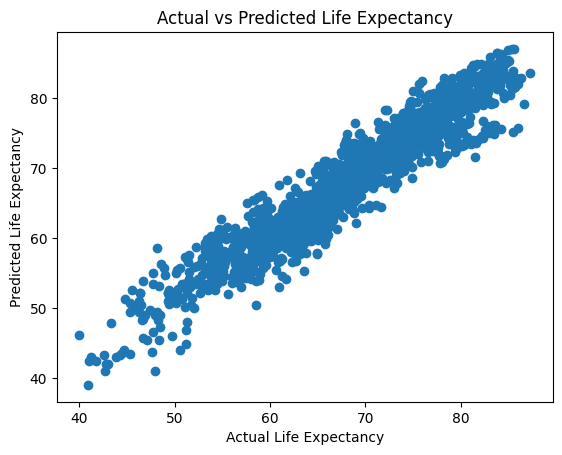

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()
